In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [40]:
rider.head(15)

Income  Lot_Size Ownership
0     60.0      18.4     Owner
1     85.5      16.8     Owner
2     64.8      21.6     Owner
3     61.5      20.8     Owner
4     87.0      23.6     Owner
5    110.1      19.2     Owner
6    108.0      17.6     Owner
7     82.8      22.4     Owner
8     69.0      20.0     Owner
9     93.0      20.8     Owner
10    51.0      22.0     Owner
11    81.0      20.0     Owner
12    75.0      19.6  Nonowner
13    52.8      20.8  Nonowner
14    64.8      17.2  Nonowner

In [41]:
rider= pd.read_csv('/Users/rajoad/Documents/GitHub/Practice-/Practice-/Decision tree/RidingMowers.csv')
rider2= rider[rider['Income'] < 59.7]
rider2

Income  Lot_Size Ownership
10    51.0      22.0     Owner
13    52.8      20.8  Nonowner
15    43.2      20.4  Nonowner
17    49.2      17.6  Nonowner
18    59.4      16.0  Nonowner
20    47.4      16.4  Nonowner
21    33.0      18.8  Nonowner
22    51.0      14.0  Nonowner

In [42]:
%pip install dmba

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [43]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline

In [44]:
import os
graph_path = 'C:/Users/mo0354/windows_10_msbuild_Release_graphviz-9.0.0-win32/Graphviz/bin'
os.environ["PATH"] += os.pathsep + graph_path

In [45]:
rider.shape

(24, 3)

In [46]:
rider

Income  Lot_Size Ownership
0     60.0      18.4     Owner
1     85.5      16.8     Owner
2     64.8      21.6     Owner
3     61.5      20.8     Owner
4     87.0      23.6     Owner
5    110.1      19.2     Owner
6    108.0      17.6     Owner
7     82.8      22.4     Owner
8     69.0      20.0     Owner
9     93.0      20.8     Owner
10    51.0      22.0     Owner
11    81.0      20.0     Owner
12    75.0      19.6  Nonowner
13    52.8      20.8  Nonowner
14    64.8      17.2  Nonowner
15    43.2      20.4  Nonowner
16    84.0      17.6  Nonowner
17    49.2      17.6  Nonowner
18    59.4      16.0  Nonowner
19    66.0      18.4  Nonowner
20    47.4      16.4  Nonowner
21    33.0      18.8  Nonowner
22    51.0      14.0  Nonowner
23    63.0      14.8  Nonowner

In [47]:
rider["Ownership" ].value_counts

<bound method IndexOpsMixin.value_counts of 0        Owner
1        Owner
2        Owner
3        Owner
4        Owner
5        Owner
6        Owner
7        Owner
8        Owner
9        Owner
10       Owner
11       Owner
12    Nonowner
13    Nonowner
14    Nonowner
15    Nonowner
16    Nonowner
17    Nonowner
18    Nonowner
19    Nonowner
20    Nonowner
21    Nonowner
22    Nonowner
23    Nonowner
Name: Ownership, dtype: object>

cLASS: Nonowner, Owner


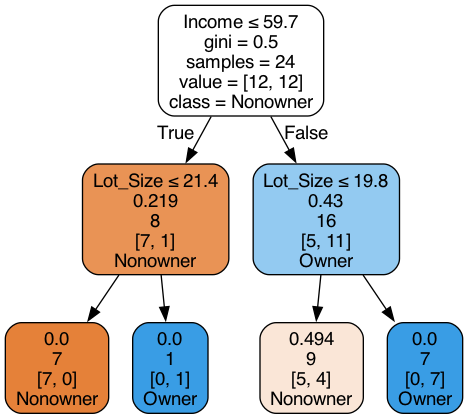

In [48]:
X= rider.drop(columns="Ownership")
y= rider['Ownership']

small= DecisionTreeClassifier(max_depth=2, random_state=47, criterion="gini")
small.fit(X,y)

print("cLASS: {}".format(', '.join(small.classes_)))
plotDecisionTree(small, feature_names= X.columns, class_names= small.classes_, impurity= True)


1!In this codeblock, root node is coming as class= Nonowner. 
How I can flip this? 
why its predicting non-owner, why not owner. 

2!who decides the configuration of each split such as in the root node it says Income <= 59.7. how the number 59.7 is decided in the root node, following to how the configuration is decided in following nodes in more splits. 

2!=Step 1: Choose the Best Feature + Threshold
For each node, the tree does the following:

Looks at every feature (e.g., Income, Lot_Size, etc.)
For each feature, it tries many possible split points (like Income ≤ 50, Income ≤ 55, Income ≤ 59.7, etc.)
At each possible split:
It divides the data into left (True) and right (False) branches.
It measures how "pure" the resulting groups are.
👉 This is done using an impurity measure like:

Gini impurity (default in DecisionTreeClassifier)
Entropy (if using criterion="entropy")




small.classes_

It stores the unique class labels (sorted) found in the target (y = rider['Ownership']) during training.
Example: If Ownership has values "Owner" and "Non-owner". 

"classes: {}".format(...)

Formats the string to include the joined class names:
print("classes: Non-owner, Owner")

"classes: {}" → a string with a placeholder {}.
.format(...) → inserts the value you provide into that {}.

classes: Nonowner, Owner


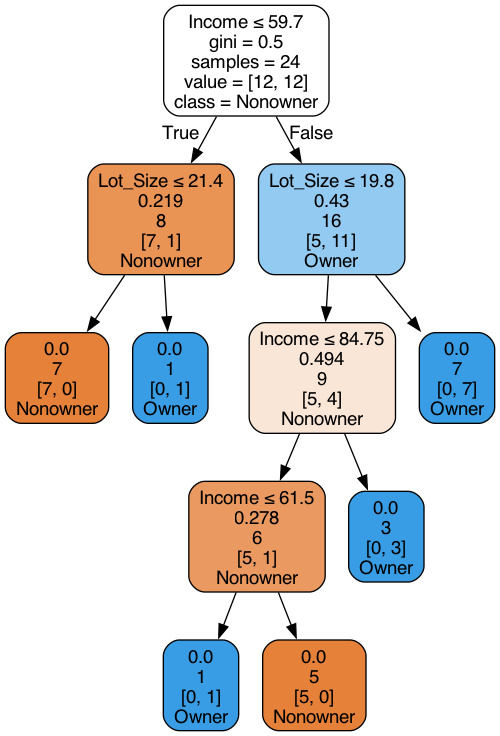

In [49]:
X= rider.drop(columns="Ownership")
y= rider["Ownership"]

full= DecisionTreeClassifier(random_state=43, criterion="gini")
full.fit(X,y)
print("classes: {}".format(', '.join(full.classes_)))
plotDecisionTree(full, feature_names=X.columns, class_names=full.classes_, impurity=True)


In [50]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create one random sample
new_data = pd.DataFrame({
    'Income': [np.random.uniform(40, 120)],      # Random income between 40-120
    'Lot_Size': [np.random.uniform(15, 25)]      # Random lot size between 15-25
})

# Make prediction using the small model
prediction = small.predict(new_data)

# Print the sample and its prediction
print("Sample Data:")
print(f"Income: ${new_data['Income'][0]:.2f}k")
print(f"Lot Size: {new_data['Lot_Size'][0]:.2f}")
print(f"\nPredicted Class: {prediction[0]}")

Sample Data:
Income: $69.96k
Lot Size: 24.51

Predicted Class: Owner


Decision Tree Structure	, Confusion Matrix and (Heatmap), Feature Importance Plot, ROC Curve & AUC, Practical Predictions.

full= DecisionTreeClassifier(random_state=43)
full.fit(rider.drop(columns=['Ownership']), rider['Ownership'])
print("classes: {}".format(', '.join(full.classes_)))
plotDecisionTree(full, feature_names= rider.columns[:2], class_names=full.classes_, impurity=True)

In [51]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(100)

# Generate 10 new samples using similar ranges
test_data = pd.DataFrame({
    'Income': np.random.uniform(50, 110, 10),      # based on observed Income range
    'Lot_Size': np.random.uniform(16.5, 24, 10)    # based on observed Lot_Size range
})

# Preview
print(test_data)


       Income   Lot_Size
0   82.604297  23.184915
1   66.702163  18.069016
2   75.471055  17.889962
3  100.686568  17.312827
4   50.283131  18.147731
5   57.294147  23.839678
6   90.244945  22.587624
7   99.551165  17.789558
8   58.202395  22.621686
9   84.505600  18.555553


In [52]:
# Predict using your trained tree
test_data['Predicted_Ownership'] = full.predict(test_data)

# Show result
print(test_data)


       Income   Lot_Size Predicted_Ownership
0   82.604297  23.184915               Owner
1   66.702163  18.069016            Nonowner
2   75.471055  17.889962            Nonowner
3  100.686568  17.312827               Owner
4   50.283131  18.147731            Nonowner
5   57.294147  23.839678               Owner
6   90.244945  22.587624               Owner
7   99.551165  17.789558               Owner
8   58.202395  22.621686               Owner
9   84.505600  18.555553            Nonowner


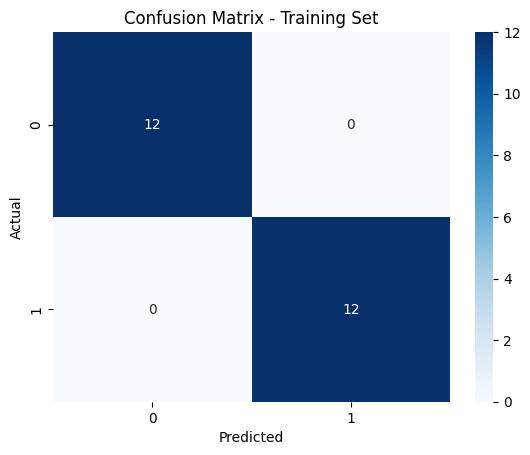

In [53]:
from sklearn.metrics import confusion_matrix


# Ensure X for prediction matches training features
X = rider[['Income', 'Lot_Size']]  # Use only the columns used for training
y_pred = full.predict(X)

cm = confusion_matrix(rider['Ownership'], y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
bank= pd.read_csv('/Users/rajoad/Documents/GitHub/Practice-/Practice-/UniversalBank.csv')
bank.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [55]:
bank.shape

(5000, 14)

In [56]:
#remove space in column names

bank.columns=bank.columns.str.replace(' ','_')

In [57]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [58]:
bank= bank.drop(columns=['ID','ZIP_Code'])


In [59]:
bank.head(2)

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0

In [60]:
# Change Personal_Loan values from {1, 0} to {'Yes', 'No'}
bank['Personal_Loan']= bank['Personal_Loan'].map({1: 'Yes', 0: 'No'})

In [61]:
bank.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan          object
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [63]:

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

Classes: No, Yes


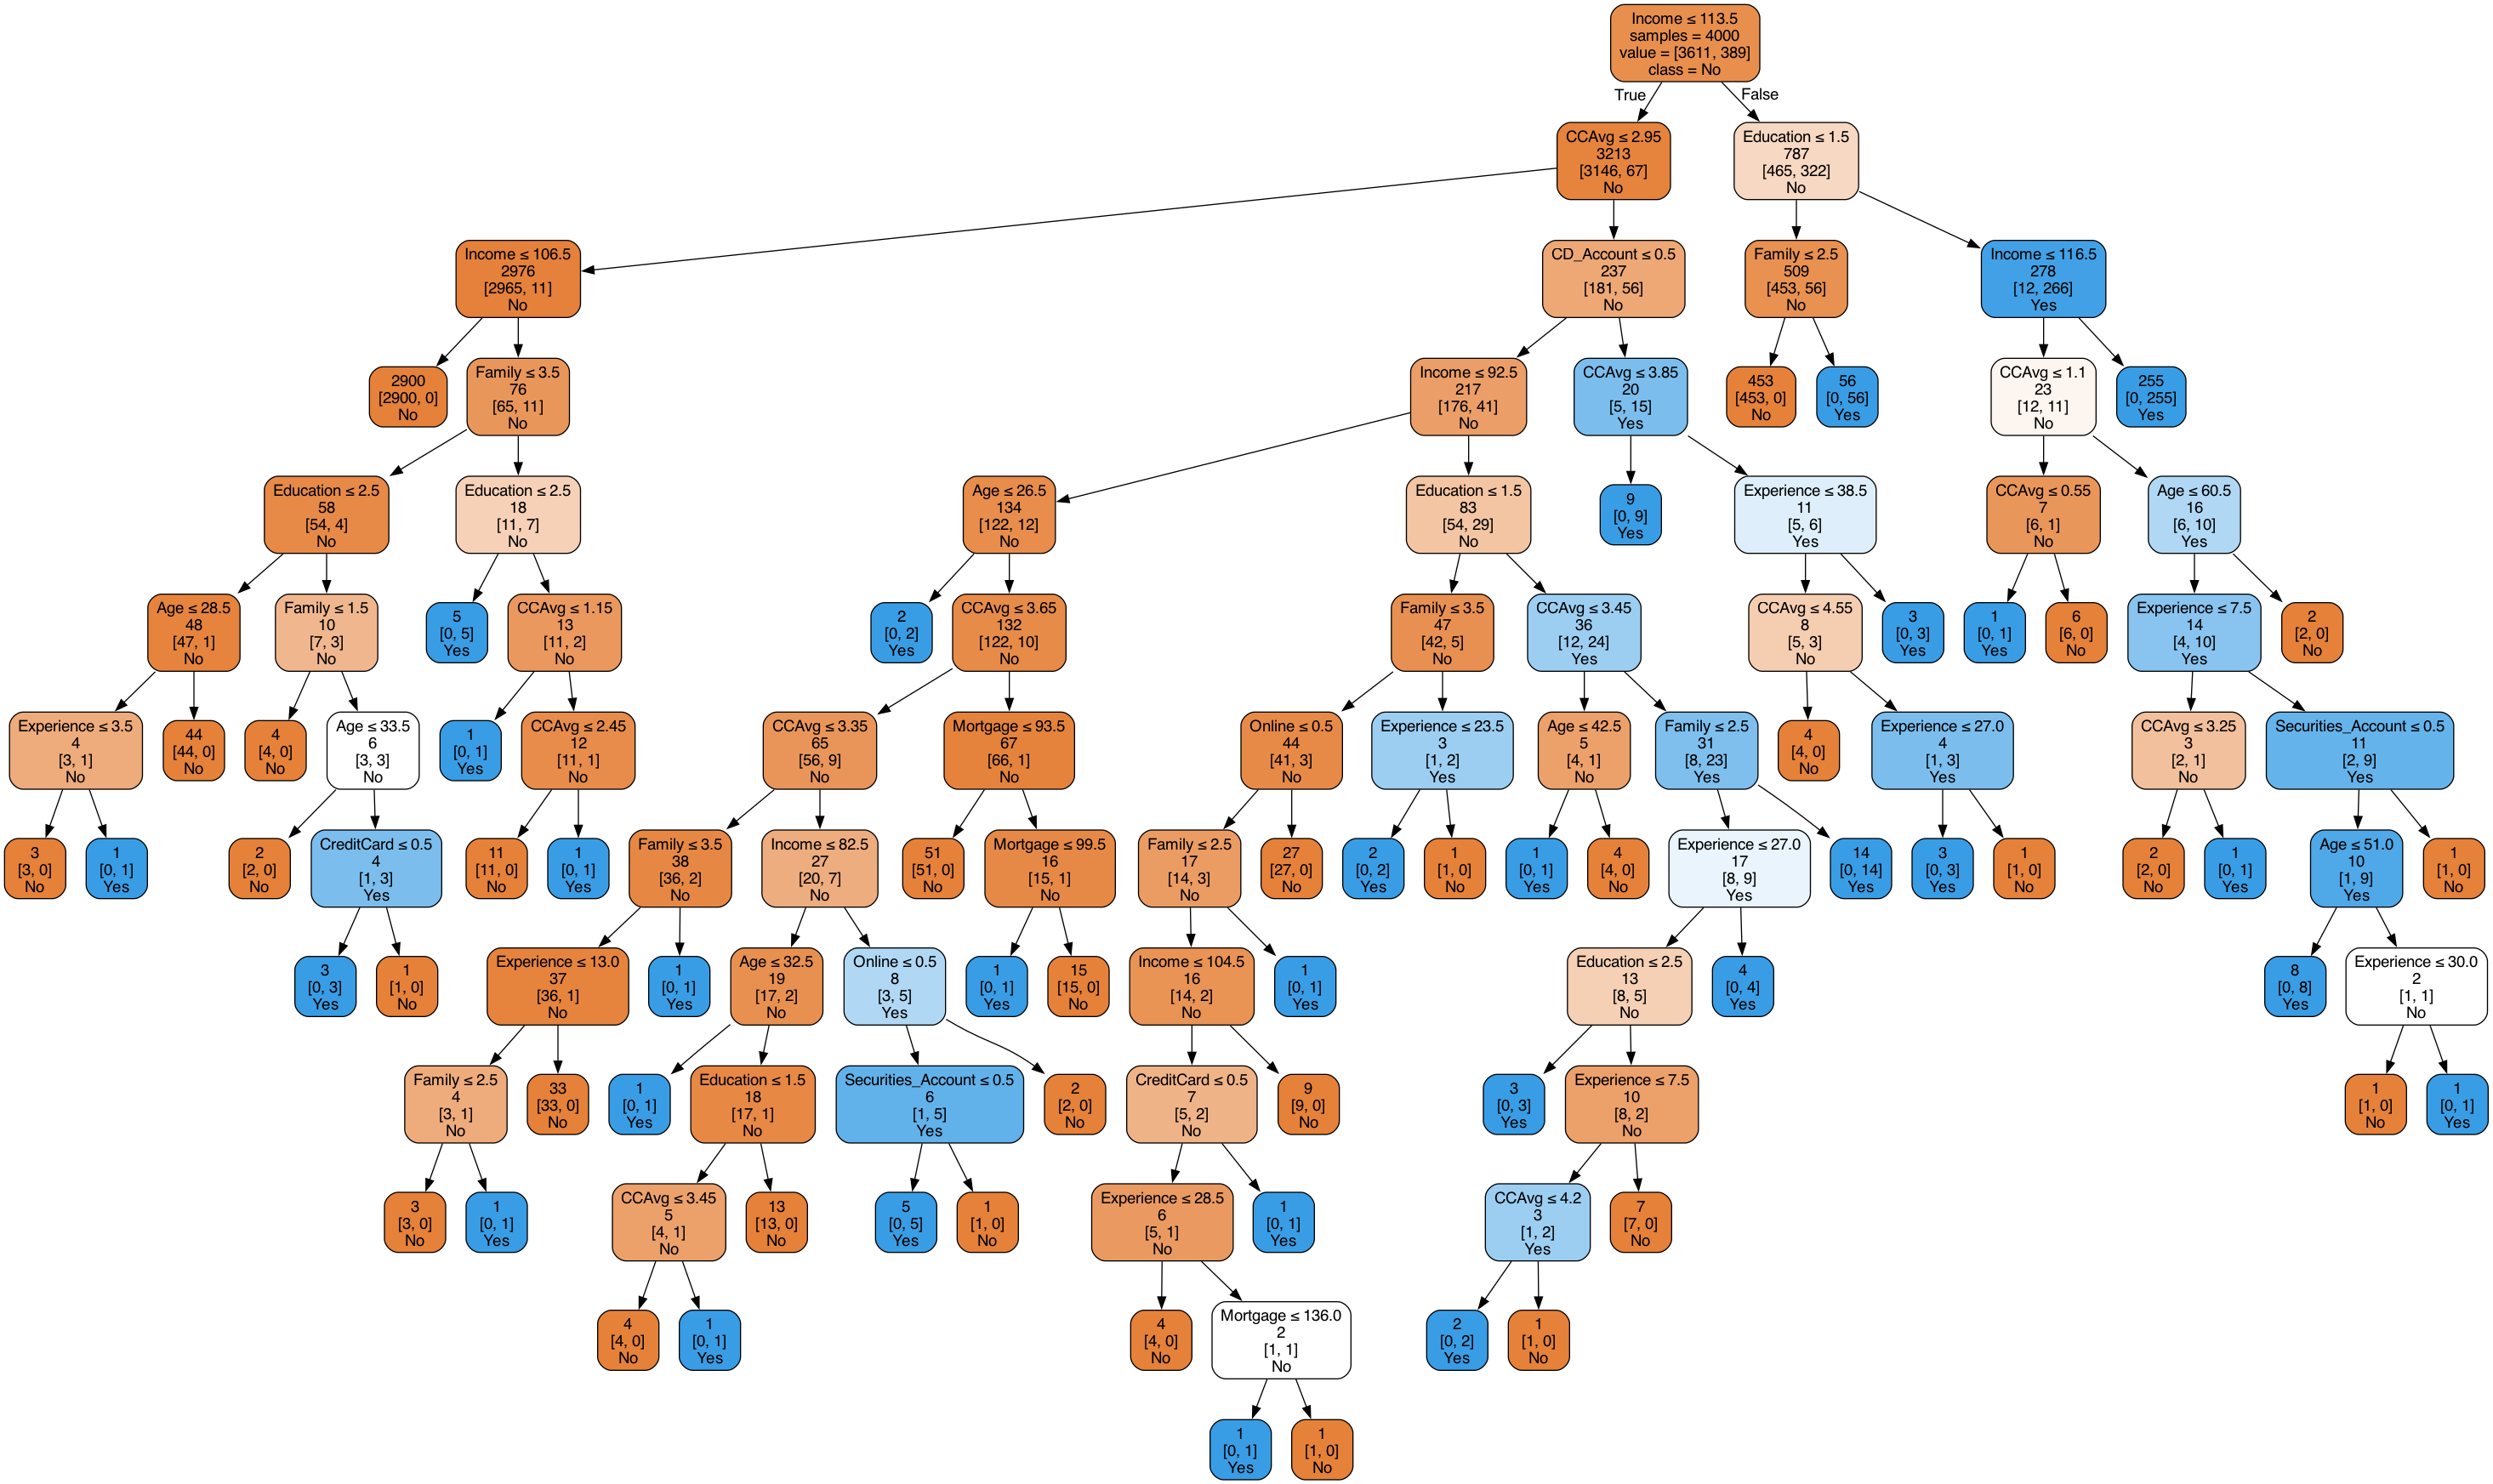

In [65]:
X= bank.drop(columns=['Personal_Loan'])
y= bank['Personal_Loan']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 41)

bank_classification= DecisionTreeClassifier(random_state= 21, criterion="gini")
bank_classification.fit(X_train, y_train)

print("Classes: {}".format(', '.join(bank_classification.classes_)))
plotDecisionTree(bank_classification, feature_names= X.columns, class_names= bank_classification.classes_)


In [66]:
y_pred= bank_classification.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, bank_classification.predict(X_test))
print("Accuracy: ", accuracy )
print("Predicted Values: ", y_pred[:20])

Accuracy:  0.982
Predicted Values:  ['No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'No']


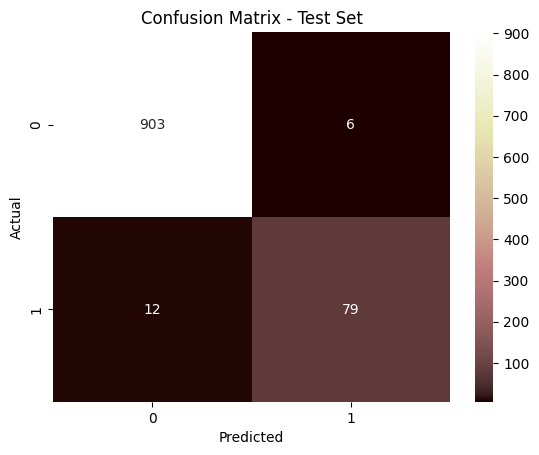

In [70]:
classification_cm= confusion_matrix(y_test, y_pred)
sns.heatmap(classification_cm, annot=True, fmt='d', cmap='pink')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Sensitivity(True Positive Rate)= Sensitivity tells us what percentage of patients with heart disease were correctly identified.

Sensitivity= TP/TP+FN

Specificity tells us what percentage of patients without heart disease were correctly identified.

Specificity = TN/ TN+FP

--------------------------

[TP FN]

[FP TN]


--------------------------

RF-sensitivity= 0.83, LG-sensitivity= 0.81

Sensitivity tells us that the Random Forest is slightly better at correctly identifying positives, which, in this case, are patients with heart disease.

RF-Specificity = 0.83, LG-Specificity = 0.85

Specificity tells us that Logistic Regression is slightly better at correctly identifying negatives, which, in this case, are patients without heart disease.

We would choose the Logistic Regression model if correctly identifying patients without heart disease was more important than correctly identifying patients with heart disease. Alternatively, we would choose the Random Forest model if correctly identifying patients with heart disease was more important than correctly identifying patients without heart disease.

------------------------------
False Positive Rate(1-Specificity)= FP/FP+TN 
iS NOT obese but classified as obese.

The ROC graph summarizes all of the confusion matrices that each threshold produced.
Sensitivity and False Positive Rate(1-Specificity).

! Precision to be learned in the same video. 


AUC: 0.931


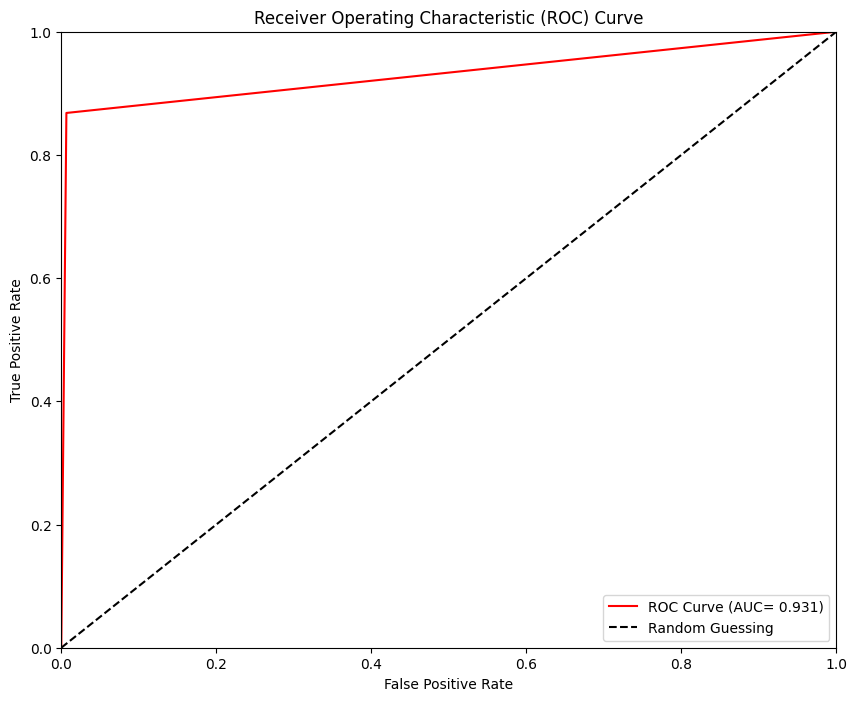

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Get predicted probabilities for the positive class ("Yes")
y_prob_pos= bank_classification.predict_proba(X_test)[:, list(bank_classification.classes_).index('Yes')]

#calculate the roc curve
fpr, tpr, thresholds= roc_curve(y_test, y_prob_pos, pos_label='Yes')

#cal AUC
roc_auc= auc(fpr, tpr)
print(f"AUC: {roc_auc:.3f}")

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='red', label=f'ROC Curve (AUC= {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='black', linestyle= '--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Since the new point (0.75, 1) is to the left of the dotted green line, we know that the proportion of correctly classified samples that were obese (true positives) is greater than the proportion of the samples that were incorrectly classified as obese (false positives).

----------------------------------------------------------------------------------------

Precision: TP/TP+FP. Proportion of positive results that were correctly classified. 
If there were lots of samples that were not obese relative to the number of obese samples, then Precision might be more useful than the False Positive Rate.

ROC curves make it easy to identify the best threshold for making a decision...

----------------------------------------------

There are two ways a classifier can be wrong. It can either have a false positive (incorrectly classifying a negative sample as positive) or a false negative (incorrectly classifying a positive sample as negative). Precision measures how many false positives you have, and recall measures how many false negatives you have. Both give a score between 0 and 1.

Since these two scores measure two different kinds of errors, we want to somehow average these two scores to get an overall sense of how good the classifier is. The F1 score averages them by the "harmonic mean" instead of the simple arithmetic mean: the harmonic mean of two numbers a,b is 2/[(1/a)+(1/b)].

-------------------------------------------------------------

1. Tree Depth (max_depth)
What it is:
Maximum number of splits from the root to any leaf.

Importance:

Controls model complexity.
A deep tree can capture more detail but risks overfitting (memorizing the training data).
A shallow tree may underfit (miss patterns).
Example:

Depth = 2 → simple model with coarse rules.
Depth = 10 → detailed model, but might overfit.
Best Practice: Tune with cross-validation. Start shallow (e.g., depth=3) and increase until validation error stops improving.

2. Minimum Number of Records in Split Nodes (min_samples_split)
What it is:
The minimum number of samples a node must have to be split.

Importance:

Prevents the tree from making insignificant splits on very small groups.
Larger values = fewer splits, simpler tree.
Smaller values = more splits, possibly overfitting.
Example:

If set to 10, a node must have ≥10 samples to consider a split.
Best Practice:

For small datasets, use smaller values (2–10).
For larger datasets, set as a percentage, like min_samples_split=0.05.


3. Minimum Number of Records in Terminal Node (min_samples_leaf)
What it is:
The minimum number of samples required to be at a leaf node (i.e., a final decision).

Importance:

Controls the granularity of decisions.
Prevents model from creating leaves based on tiny samples that may not generalize.
Helps with smoothing predictions.
Example:

If set to 5, every leaf must have at least 5 samples.
Best Practice:

Useful for avoiding splits that are statistically weak.
In classification, ensures predictions are based on enough data.


4. Minimum Impurity Decrease (min_impurity_decrease)
What it is:
The minimum reduction in impurity (e.g., Gini or entropy) required to make a split.

Importance:

Prevents the model from splitting just to make small gains.
Adds a quality threshold for splits.
Helps avoid unnecessary complexity.
Example:

If the impurity decreases by less than 0.01, the split won’t happen.
Best Practice:

Helps especially when working with noisy data.
Can be used along with other pruning parameters.

In [80]:
credit= pd.read_csv('/Users/rajoad/Documents/GitHub/Practice-/Practice-/Decision tree/CreditHistory_Clean.csv')
credit.head()

age  amount  duration  checking  history purpose  savings  employed  \
0   67    1169         6         1        4       3        5         5   
1   22    5951        48         2        2       3        1         3   
2   49    2096        12         4        4       6        1         4   
3   45    7882        42         1        2       2        1         4   
4   53    4870        24         1        3       0        1         3   

   installp  marital  ...  resident  property  other  housing  existcr  job  \
0         4        3  ...         4         1      3        2        2    3   
1         2        2  ...         2         1      3        2        1    3   
2         2        3  ...         3         1      3        2        1    2   
3         2        3  ...         4         2      3        3        1    3   
4         3        3  ...         4         4      3        3        2    3   

   depends  telephon  foreign  good_bad  
0        1         2        1      good  
1        1         1        1       bad  
2        2         1        1      good  
3        2         1        1      good  
4        2         1        1       bad  

[5 rows x 21 columns]

In [81]:
credit.isna().sum()

age         0
amount      0
duration    0
checking    0
history     0
purpose     0
savings     0
employed    0
installp    0
marital     0
coapp       0
resident    0
property    0
other       0
housing     0
existcr     0
job         0
depends     0
telephon    0
foreign     0
good_bad    0
dtype: int64

In [82]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1000 non-null   int64 
 1   amount    1000 non-null   int64 
 2   duration  1000 non-null   int64 
 3   checking  1000 non-null   int64 
 4   history   1000 non-null   int64 
 5   purpose   1000 non-null   object
 6   savings   1000 non-null   int64 
 7   employed  1000 non-null   int64 
 8   installp  1000 non-null   int64 
 9   marital   1000 non-null   int64 
 10  coapp     1000 non-null   int64 
 11  resident  1000 non-null   int64 
 12  property  1000 non-null   int64 
 13  other     1000 non-null   int64 
 14  housing   1000 non-null   int64 
 15  existcr   1000 non-null   int64 
 16  job       1000 non-null   int64 
 17  depends   1000 non-null   int64 
 18  telephon  1000 non-null   int64 
 19  foreign   1000 non-null   int64 
 20  good_bad  1000 non-null   object
dtypes: int64(19), o

In [83]:
# Check the data type of the 'purpose' column
print(credit['purpose'].dtype)

object


In [84]:
# Change 'purpose' column to integer codes
credit['purpose'] = credit['purpose'].astype('category').cat.codes
print(credit['purpose'].dtype)

int8


In [85]:
credit.shape

(1000, 21)

In [86]:
credit.describe()

age        amount     duration     checking     history  \
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.00000   
mean     35.546000   3271.258000    20.903000     2.577000     2.54500   
std      11.375469   2822.736876    12.058814     1.257638     1.08312   
min      19.000000    250.000000     4.000000     1.000000     0.00000   
25%      27.000000   1365.500000    12.000000     1.000000     2.00000   
50%      33.000000   2319.500000    18.000000     2.000000     2.00000   
75%      42.000000   3972.250000    24.000000     4.000000     4.00000   
max      75.000000  18424.000000    72.000000     4.000000     4.00000   

           purpose      savings     employed     installp     marital  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean      2.710000     2.105000     3.384000     2.973000     2.68200   
std       2.484366     1.580023     1.208306     1.118715     0.70808   
min       0.000000     1.000000     1.000000     1.000000     1.00000   
25%       1.000000     1.000000     3.000000     2.000000     2.00000   
50%       2.000000     1.000000     3.000000     3.000000     3.00000   
75%       3.000000     3.000000     5.000000     4.000000     3.00000   
max       9.000000     5.000000     5.000000     4.000000     4.00000   

             coapp     resident     property        other      housing  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.145000     2.845000     2.358000     2.675000     1.929000   
std       0.477706     1.103718     1.050209     0.705601     0.531264   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     2.000000     1.000000     3.000000     2.000000   
50%       1.000000     3.000000     2.000000     3.000000     2.000000   
75%       1.000000     4.000000     3.000000     3.000000     2.000000   
max       3.000000     4.000000     4.000000     3.000000     3.000000   

           existcr          job      depends     telephon      foreign  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean      1.407000     2.904000     1.155000     1.404000     1.037000  
std       0.577654     0.653614     0.362086     0.490943     0.188856  
min       1.000000     1.000000     1.000000     1.000000     1.000000  
25%       1.000000     3.000000     1.000000     1.000000     1.000000  
50%       1.000000     3.000000     1.000000     1.000000     1.000000  
75%       2.000000     3.000000     1.000000     2.000000     1.000000  
max       4.000000     4.000000     2.000000     2.000000     2.000000

Classes: bad, good


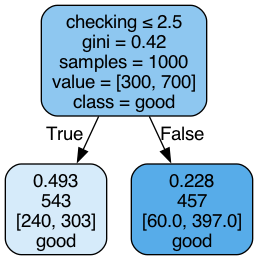

In [87]:
X= credit.drop(columns=['good_bad'])
y= credit['good_bad']

credit_small= DecisionTreeClassifier(max_depth=1, random_state=48, criterion="gini")
credit_small.fit(X,y)

print("Classes: {}".format(', '.join(credit_small.classes_)))
plotDecisionTree(credit_small, feature_names=X.columns, class_names=credit_small.classes_, impurity=True)

Classes: bad, good


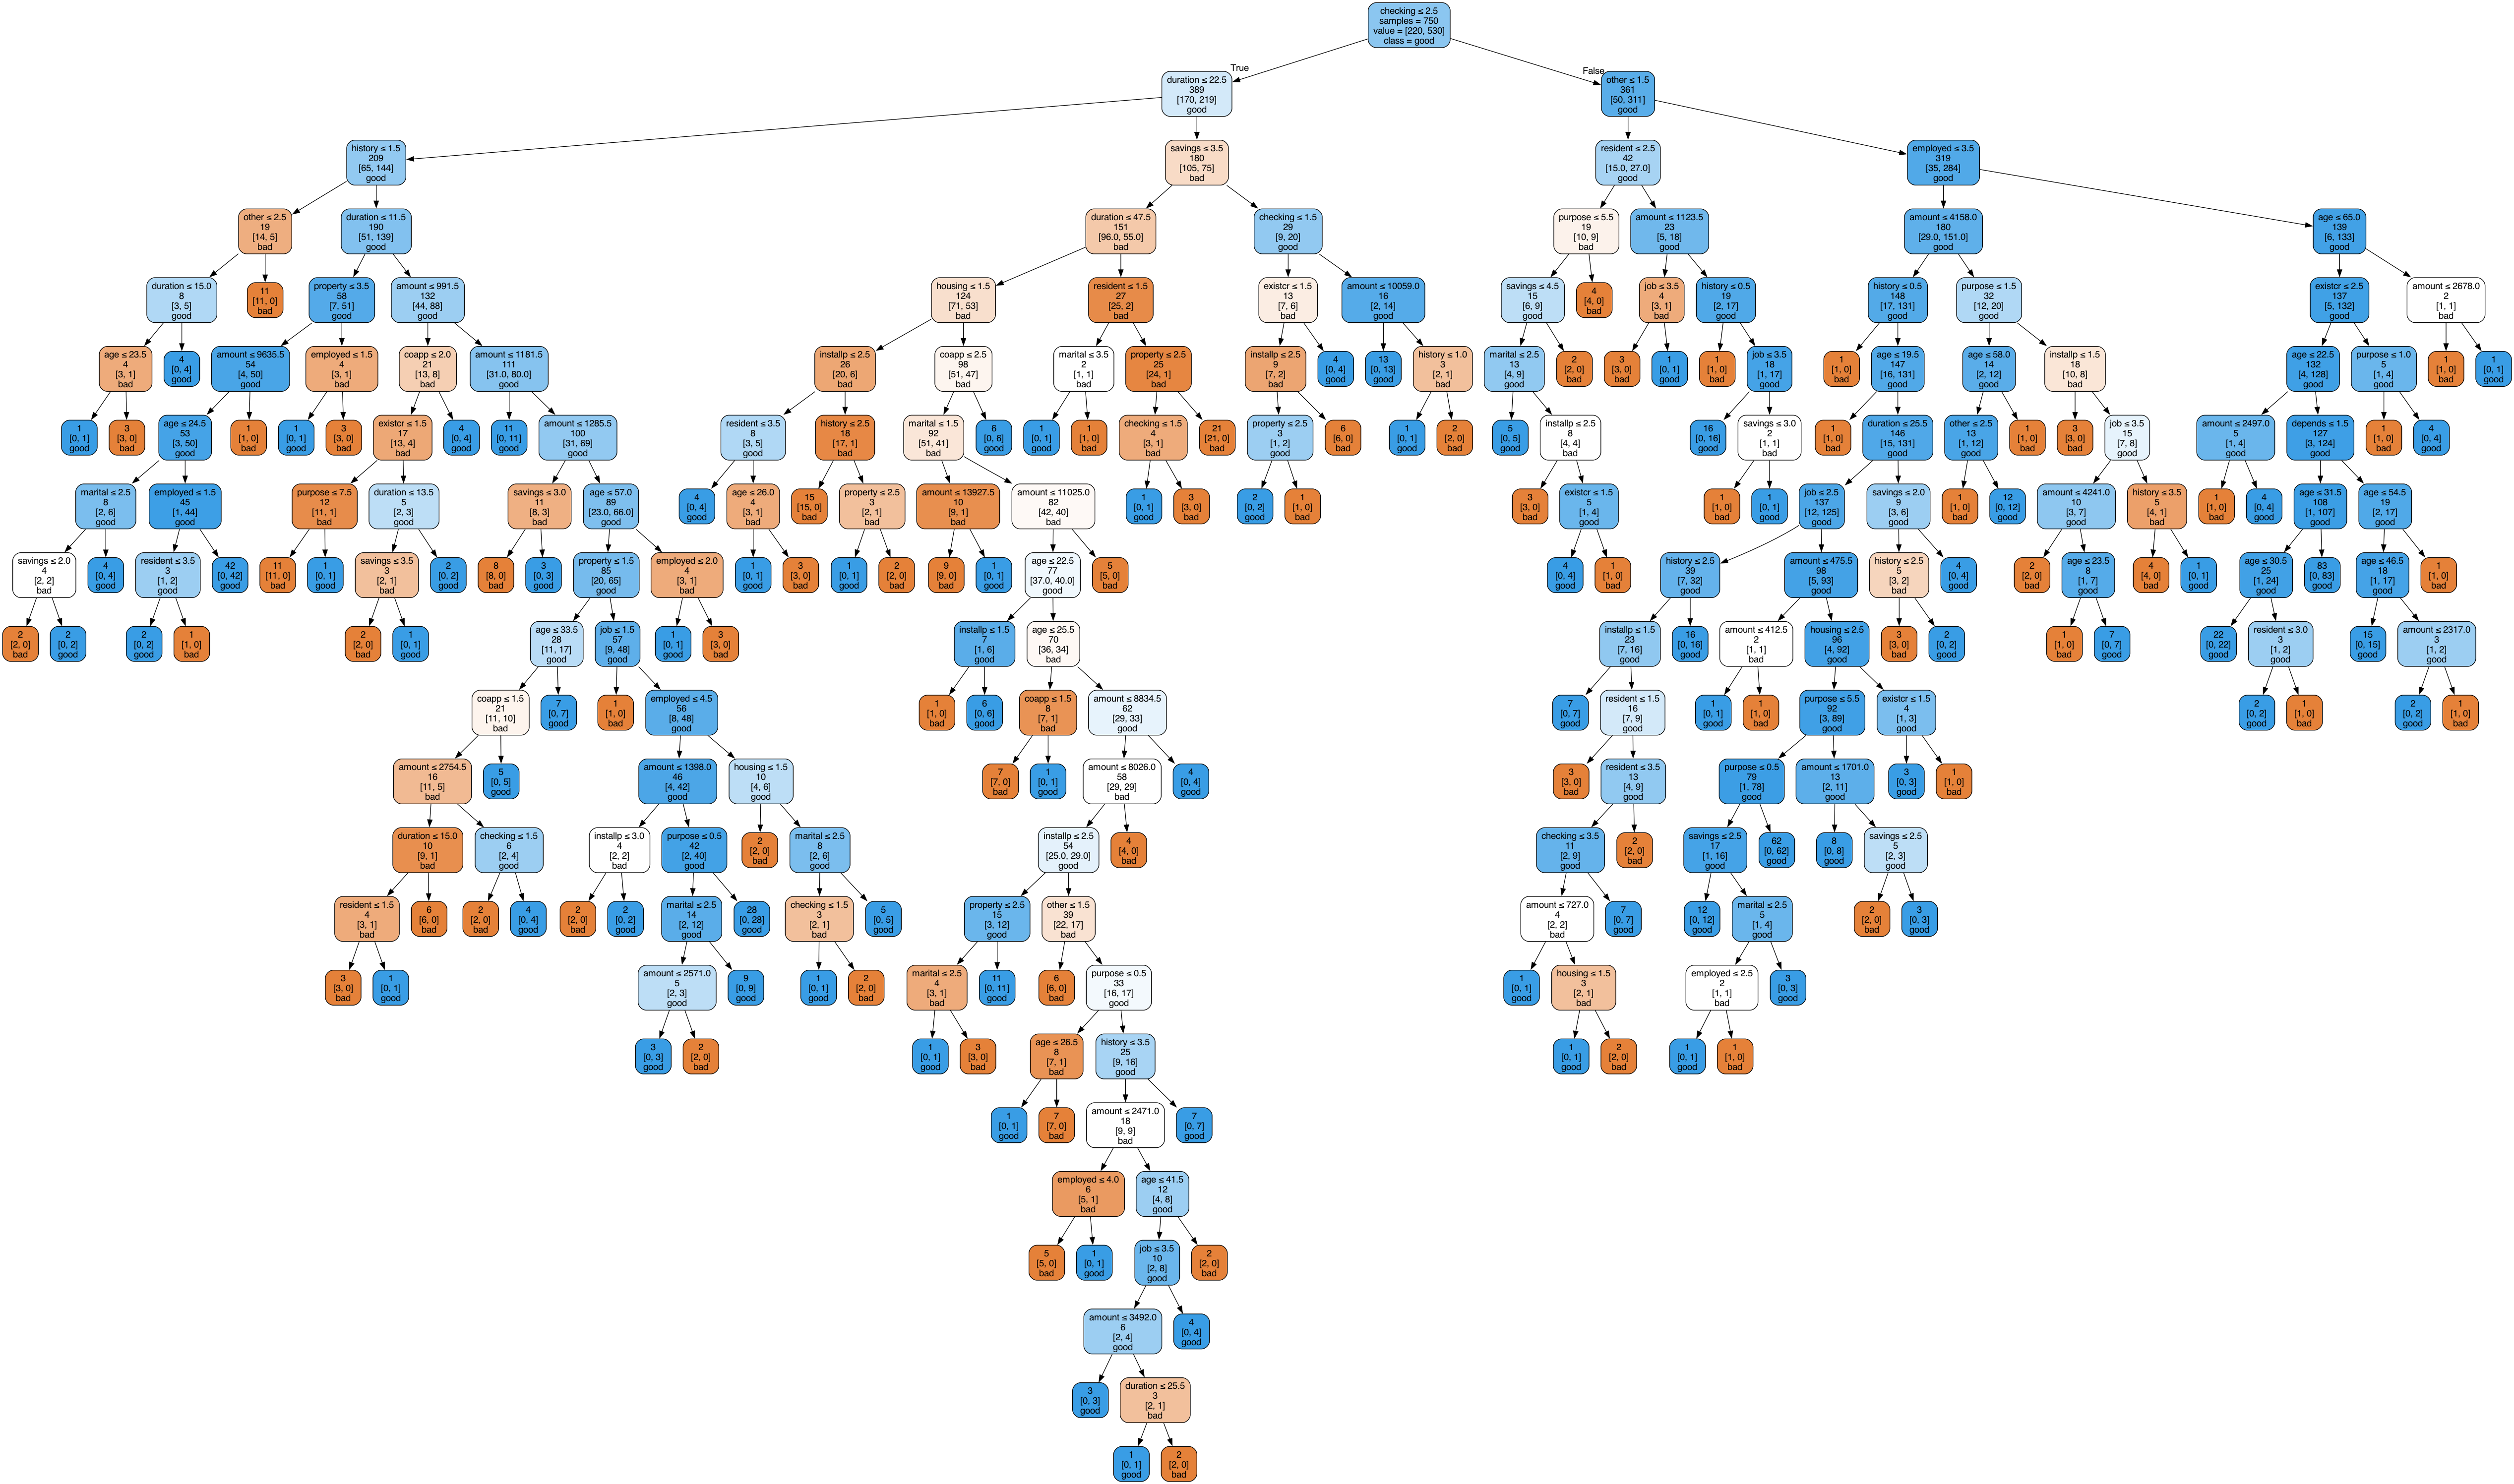

In [101]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X= credit.drop(columns=['good_bad'])
y= credit['good_bad']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=67)
credit_model= DecisionTreeClassifier(random_state=67, criterion='gini')

credit_model.fit(X_train, y_train)

print("Classes: {}".format(', '.join(credit_model.classes_)))
plotDecisionTree(credit_model, feature_names= X.columns, class_names= credit_model.classes_)



In [102]:
y_pred= credit_model.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.2f}")

accuracy: 0.70


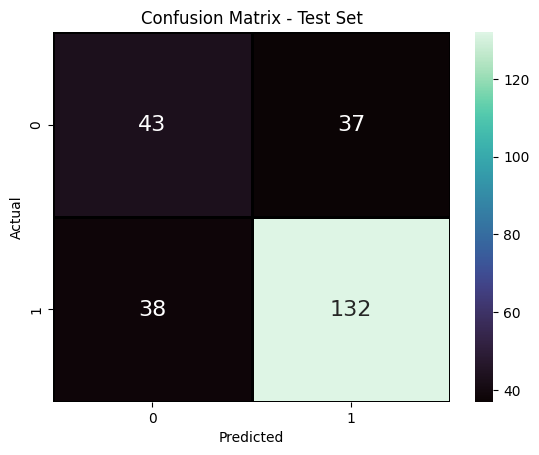

In [110]:
credit_cm= confusion_matrix(y_test, y_pred)
sns.heatmap(credit_cm, annot=True, fmt='d', cmap='mako', cbar=True, linewidths=1, linecolor='Black', annot_kws= {"size":16})
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC for credit model: 0.657


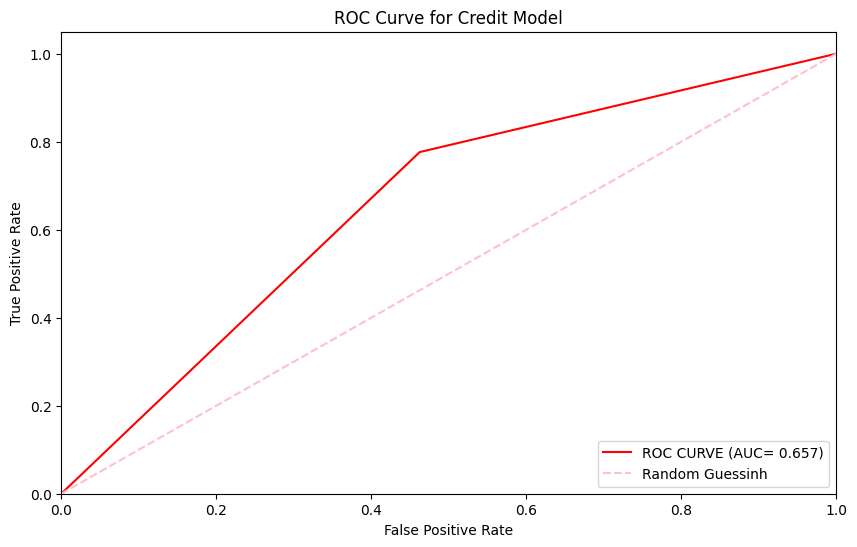

In [115]:
y_prob_posi= credit_model.predict_proba(X_test)[:, list(credit_model.classes_).index('good')]

fpr, tpr, thresholds= roc_curve(y_test, y_prob_posi, pos_label='good')

roc_auc_credit= auc(fpr, tpr)
print(f"AUC for credit model: {roc_auc_credit:.3f}")

plt.figure(figsize= (10,6))
plt.plot(fpr, tpr, color='red', label=f'ROC CURVE (AUC= {roc_auc_credit:.3f})')
plt.plot([0,1],[0,1], color='pink', linestyle= '--', label= "Random Guessinh")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Credit Model')
plt.legend(loc='lower right')
plt.show()

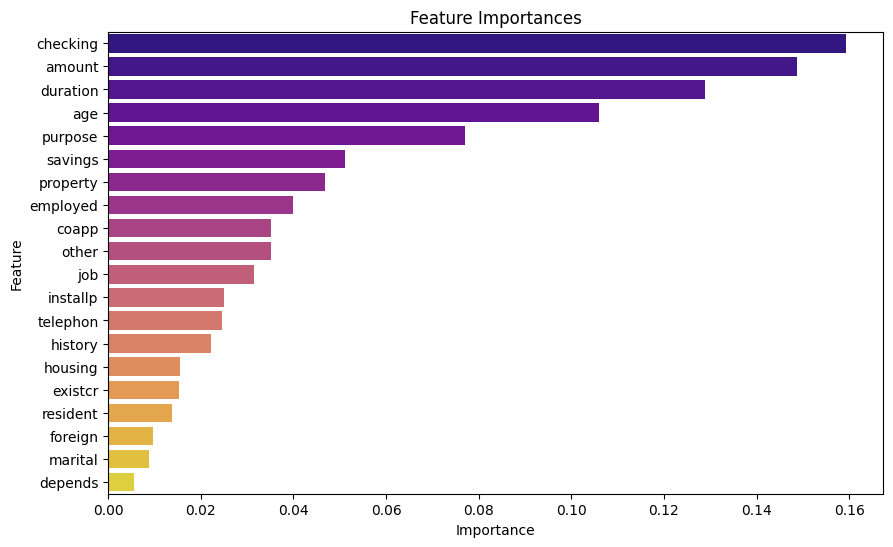

In [41]:

importances= credit_model.feature_importances_
feature_importances= pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, hue= 'Feature', palette='plasma')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [116]:
para_grid={
    'max_depth': [20,40,60,80],
    'min_samples_split': [10,20,30,60],
    'min_samples_leaf': [5,10,20,30],
    'min_impurity_decrease': [0, 0.20, 0.30, 0.40]
}

gridSearch= GridSearchCV(DecisionTreeClassifier(random_state=7), para_grid, cv=5, n_jobs=-1,scoring='accuracy')
gridSearch.fit(X_train, y_train)
print("Grid Search best score: ", gridSearch.best_score_)
print("Grid Search Parameters: ", gridSearch.best_params_)

Grid Search best score:  0.7266666666666668
Grid Search Parameters:  {'max_depth': 20, 'min_impurity_decrease': 0, 'min_samples_leaf': 10, 'min_samples_split': 30}


In [117]:
param_grid= {
    'max_depth': [15, 17, 20, 25, 27],
    'min_samples_split': [25, 27, 30, 32, 35],
    'min_samples_leaf': [5,7,10,13,15],
    'min_impurity_decrease': [0.00, 0.1, 0, 0.2, 0.3]
}

grid_imr= GridSearchCV(DecisionTreeClassifier(random_state=89), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_imr.fit(X_train, y_train)
print('Improved accuracy score:', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree= grid_imr.best_estimator_

Improved accuracy score: 0.7266666666666668
Improved parameters:  {'max_depth': 20, 'min_impurity_decrease': 0, 'min_samples_leaf': 10, 'min_samples_split': 30}


Test Accuracy (Tuned Model): 0.700


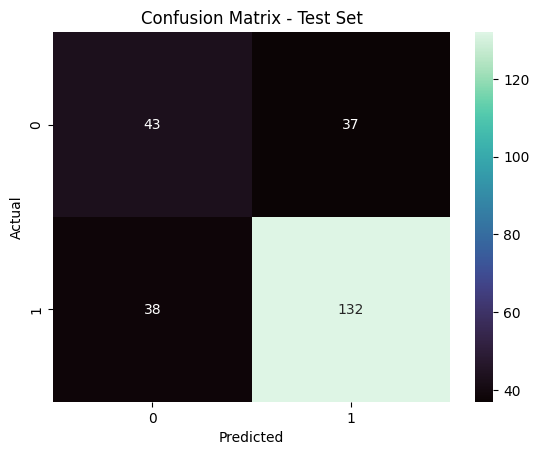

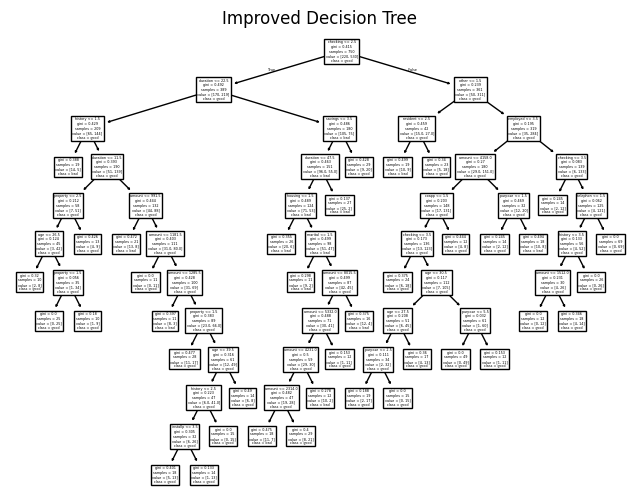

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
y_pred_best= bestClassTree.predict(X_test)

accuracy= accuracy_score(y_test, y_pred)
print("Test Accuracy (Tuned Model): {:.3f}".format(accuracy))


conf_matrix= confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='mako')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8,6))
plot_tree(bestClassTree, feature_names= X.columns, class_names= bestClassTree.classes_, impurity=True)
plt.title("Improved Decision Tree")
plt.show()

In [136]:
house= pd.read_csv('/Users/rajoad/Documents/GitHub/Practice-/Practice-/housingto.csv')
house.head(2)

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished

In [137]:
house.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [138]:
house['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [139]:
house= pd.get_dummies(house, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], dtype= 'int')
house.head(2)

price  area  bedrooms  bathrooms  stories  parking furnishingstatus  \
0  13300000  7420         4          2        3        2        furnished   
1  12250000  8960         4          4        4        3        furnished   

   mainroad_no  mainroad_yes  guestroom_no  guestroom_yes  basement_no  \
0            0             1             1              0            1   
1            0             1             1              0            1   

   basement_yes  hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0             0                   1                    0                   0   
1             0                   1                    0                   0   

   airconditioning_yes  prefarea_no  prefarea_yes  
0                    1            0             1  
1                    1            1             0

In [140]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
house['furnishingstatus']= le.fit_transform(house['furnishingstatus'])
house.head(2)

price  area  bedrooms  bathrooms  stories  parking  furnishingstatus  \
0  13300000  7420         4          2        3        2                 0   
1  12250000  8960         4          4        4        3                 0   

   mainroad_no  mainroad_yes  guestroom_no  guestroom_yes  basement_no  \
0            0             1             1              0            1   
1            0             1             1              0            1   

   basement_yes  hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0             0                   1                    0                   0   
1             0                   1                    0                   0   

   airconditioning_yes  prefarea_no  prefarea_yes  
0                    1            0             1  
1                    1            1             0

In [141]:
house['furnishingstatus'].value_counts()

furnishingstatus
1    227
2    178
0    140
Name: count, dtype: int64

In [143]:
X= house.drop(columns=['price'])
y= house['price']

train_X, test_X, train_y, test_y= train_test_split(X,y,test_size=0.2, random_state=50)

param_grid= {
    'max_depth': [5,10,15,20,40,80],
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
    'min_samples_split': [2,5,10,30, 40, 50],
}

gridSearch= GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

print("Initial Parameters:", gridSearch.best_params_)
print("Initial Score:", gridSearch.best_score_)

param_grid = {
    'max_depth': [12, 14, 15, 16, 18],  # Narrowed around 15
    'min_samples_split': [20, 25, 30, 35, 40],  # Around 30
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.002]  # Around 0, adding some small improvements
}

gridSearch= GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

print("Improved Parameters:", gridSearch.best_params_)
print("Improved Score:", gridSearch.best_score_) 
bestRegTree = gridSearch.best_estimator_

Initial Parameters: {'max_depth': 15, 'min_impurity_decrease': 0, 'min_samples_split': 30}
Initial Score: 0.44780125422207623
Improved Parameters: {'max_depth': 12, 'min_impurity_decrease': 0.001, 'min_samples_split': 35}
Improved Score: 0.4589834314531382


In [144]:
from sklearn.metrics import mean_squared_error, r2_score
regressionSummary(train_y, bestRegTree.predict(train_X))
regressionSummary(test_y, bestRegTree.predict(test_X))



Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1112846.4479
            Mean Absolute Error (MAE) : 795595.4034
          Mean Percentage Error (MPE) : -4.6263
Mean Absolute Percentage Error (MAPE) : 17.1751

Regression statistics

                      Mean Error (ME) : -159795.0799
       Root Mean Squared Error (RMSE) : 1214168.6838
            Mean Absolute Error (MAE) : 913520.2388
          Mean Percentage Error (MPE) : -8.1421
Mean Absolute Percentage Error (MAPE) : 20.5049


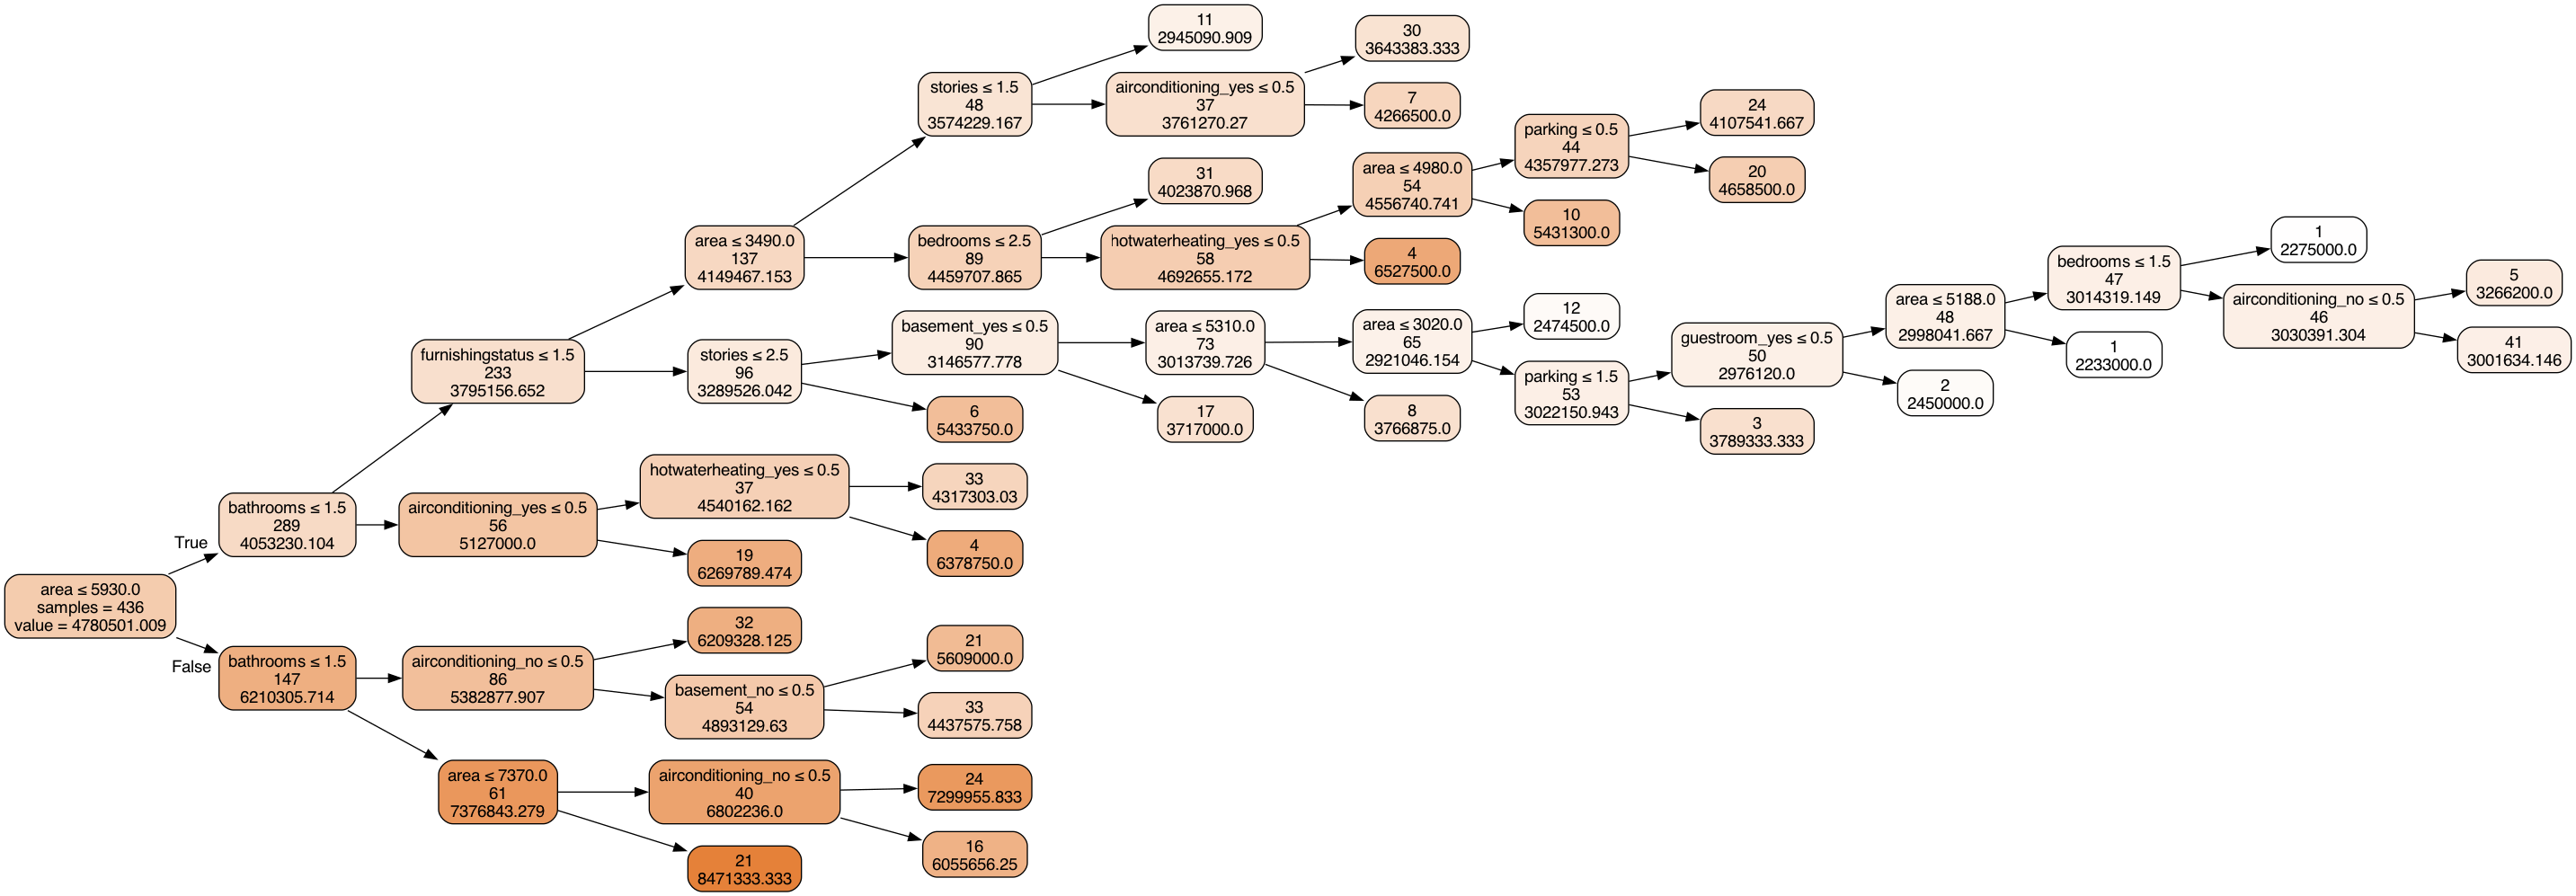

In [145]:
plotDecisionTree(bestRegTree, feature_names=X.columns, impurity=True)
plotDecisionTree(bestRegTree, feature_names=train_X.columns, rotate=True)

In [151]:
bank_random= pd.read_csv('/Users/rajoad/Documents/GitHub/Practice-/Practice-/UniversalBank.csv')
bank_random= bank_random.drop(columns=['ID','ZIP Code'])

bank_random.head(2)

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0

In [153]:
bank_random= bank_random.rename(columns={'Personal Loan': 'Personal_Loan'})
bank_random.head(2)

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0

In [154]:
X= bank_random.drop(columns=['Personal_Loan'])
y= bank_random['Personal_Loan']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=97)

bank_random_model= RandomForestClassifier(random_state=97, n_estimators=100)
bank_random_model.fit(X_train, y_train)




RandomForestClassifier(random_state=97)

Ultimately, we can measure how accurate our random forest is by the proportion of Out-Of-Bag samples that were correctly classified by the Random Forest. 

The proportion of Out-Of-Bag samples that were incorrectly classified is the "Out-Of-Bag
Error"

1) Build a Random Forest

2) Estimate the accuracy of a Random Forest.

...change the number of variables used per step... in first step

Do this for a bunch of times and then choose the one that is most accurate.

Typically, we start by using the square of the number of variables and then try a a few settings above and below that value.

In [159]:
importances_rf= bank_random_model.feature_importances_

std_rf= np.std([tree.feature_importances_ for tree in bank_random_model.estimators_], axis=0)

dfr= pd.DataFrame({'feature': train_X.columns, 'importance' : importances_rf, 'std': std_rf})
dfr= dfr.sort_values(by='importance')
print(dfr)

ax= dfr.plot(kind='barh', xerr='std', x='feature')
ax.set_label('')

plt.show()

ValueError: All arrays must be of the same length

In [64]:
classificationSummary(test_y, bank_rand_model.predict(test_X))

Confusion Matrix (Accuracy 0.9850)

       Prediction
Actual   0   1
     0 905   1
     1  14  80


In [ ]:
# RO92
# # This code performs a grid search for hyperparameter tuning of a decision tree regressor on a Toyota Corolla dataset to predict car prices.

toyotaCorolla_dfRO92 = dmba.load_data('ToyotaCorolla.csv').iloc[:1000,:]
toyotaCorolla_dfRO92 = toyotaCorolla_dfRO92.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})

predictors = ['Age', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC',
              'Doors', 'Tax', 'Weight']
outcome = 'Price'

X = pd.get_dummies(toyotaCorolla_dfRO92[predictors], drop_first=True)
y = toyotaCorolla_dfRO92[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# user grid search to find optimized tree
param_gridRO92 = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
    'min_samples_split': [10, 20, 30, 40, 50],
}
gridSearchRO92 = GridSearchCV(DecisionTreeRegressor(), param_gridRO92, cv=5, n_jobs=-1)
gridSearchRO92.fit(train_X, train_y)
print('Initial parameters: ', gridSearchRO92.best_params_)

param_gridRO92 = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008],
    'min_samples_split': [14, 15, 16, 18, 20, ],
}
gridSearchRO92 = GridSearchCV(DecisionTreeRegressor(), param_gridRO92, cv=5, n_jobs=-1)
gridSearchRO92.fit(train_X, train_y)
print('Improved parameters: ', gridSearchRO92.best_params_)

regTreeRO92 = gridSearchRO92.best_estimator_

ValueError: Data file {name} not found

In [88]:
per= pd.read_csv('/Users/rajoad/Documents/GitHub/Practice-/Practice-/personality_datasert.csv')
per.head()

Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert

In [89]:
per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [90]:
per.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [91]:
per.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Stage_fear                 2900 non-null   object
 1   Drained_after_socializing  2900 non-null   object
 2   Personality                2900 non-null   object
dtypes: object(3)
memory usage: 68.1+ KB


In [92]:
per.select_dtypes(include='object').describe()

Stage_fear Drained_after_socializing Personality
count        2900                      2900        2900
unique          2                         2           2
top            No                        No   Extrovert
freq         1490                      1493        1491

In [93]:
per['Personality'].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

In [94]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
binary_cols= per.select_dtypes(include='object').columns
for col in binary_cols:
    per[col]= le.fit_transform(per[col])

In [95]:
per.head()

Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0           0                      4.0            6.0   
1               9.0           1                      0.0            0.0   
2               9.0           1                      1.0            2.0   
3               0.0           0                      6.0            7.0   
4               3.0           0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                          0                 13.0             5.0            0  
1                          1                  0.0             3.0            1  
2                          1                  5.0             2.0            1  
3                          0                 14.0             8.0            0  
4                          0                  8.0             5.0            0

In [96]:
per['Personality'].value_counts()

Personality
0    1491
1    1409
Name: count, dtype: int64

0= Extrovert
1= Introvert

Why use it?

If your target variable (y_p1) is imbalanced (e.g., more "Extrovert" than "Introvert"), using stratify=y_p1 makes sure both the train and validation sets have the same ratio of each class as the original data.
This helps prevent bias and ensures fair evaluation of your model.

Cross-Validation Scores: [0.86206897 0.85344828 0.87068966 0.87715517 0.875     ]
Mean CV Accuracy: 0.8676724137931036


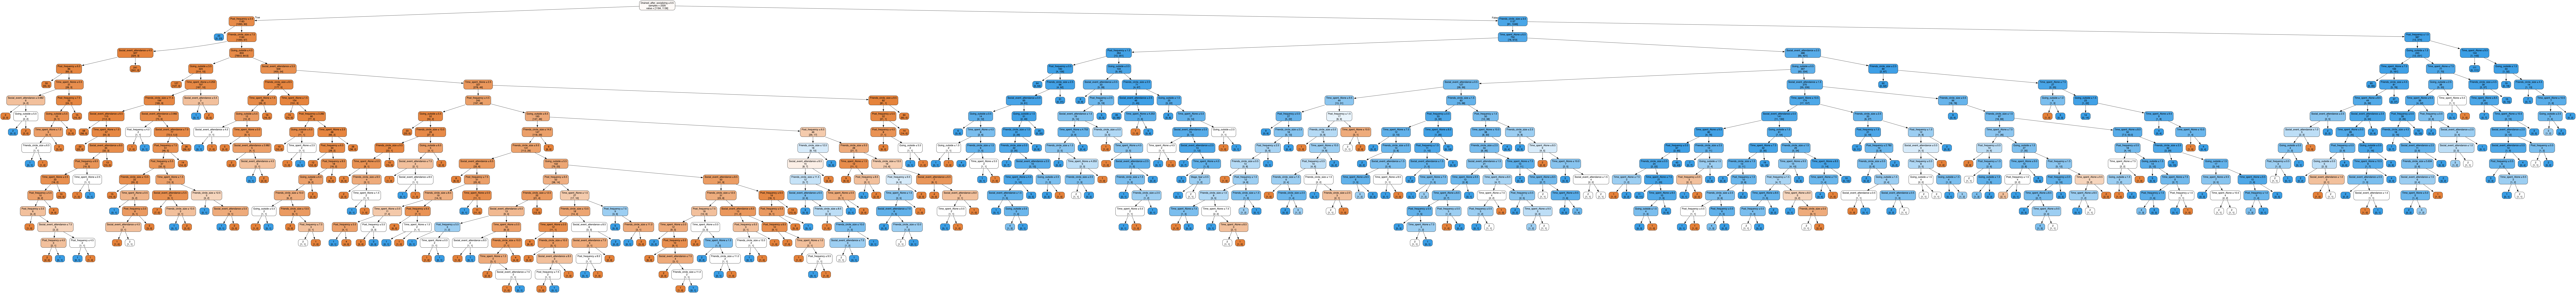

In [99]:
X_p1= per.drop(columns=['Personality'])
y_p1= per['Personality']
X_train_p1, X_valid_p1, y_train_p1, y_valid_p1 = train_test_split(X_p1, y_p1, test_size=0.2, random_state=47)

tree_p1= DecisionTreeClassifier(random_state=47)

cv_scores = cross_val_score(tree_p1, X_train_p1, y_train_p1, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

tree_p1.fit(X_train_p1, y_train_p1)
plotDecisionTree(tree_p1, feature_names=X_train_p1.columns)

In [100]:
classificationSummary(y_train_p1, tree_p1.predict(X_train_p1))
classificationSummary(y_valid_p1, tree_p1.predict(X_valid_p1))

Confusion Matrix (Accuracy 0.9797)

       Prediction
Actual    0    1
     0 1168   16
     1   31 1105
Confusion Matrix (Accuracy 0.8983)

       Prediction
Actual   0   1
     0 280  27
     1  32 241
